# 1. Сравнение  4 типов интервалов

### Оценка доверительного интервала

##### $1 - 2 \alpha$ центральный интервал:

$$C_n = 2 \hat{\theta} - \hat{\theta}^{(1 - \alpha)}, 2 \hat{\theta} - \hat{\theta}^{(\alpha)}$$


##### $1 - 2 \alpha$ нормальный интервал:

$$C_n = \hat{\theta} - z_{\alpha}v_{boot}, \hat{\theta} - z_{1 - \alpha}v_{boot}$$


##### $1 - 2 \alpha$ перцентильный интервал:

$$C_n = \left(\hat{\theta}^{(\alpha)}, \hat{\theta}^{(1 - \alpha)}\right)$$

##### $1 - 2 \alpha$ bootstrap-t интервал:


Bootstrap-t оценивается по-другому:

$$C_n = \left( \hat{\theta} - \hat{se} \cdot \hat{t}^{(1 - \alpha)}, \hat{\theta} - \hat{se} \cdot \hat{t}^{(\alpha)} \right),$$

где квантили $t$ считаются от следующих оценок по бутстрапным выборкам:

$$t^*(b) = \frac{\hat{\theta}^*(b) - \hat{\theta}}{\hat{se}^*(b)}$$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(font_scale=2)

In [15]:
from scipy.stats import cauchy
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import expon
def mean(X):
    return np.mean(X, axis=1)

def mean_t(X, X_original):
    return (np.mean(X, axis=1) - np.mean(X_original)) / np.std(X, axis=1)

def percentile_confidence_interval(X, q=5):
    return np.percentile(X, q=q / 2), np.percentile(X, q=100 - q / 2)

In [190]:
def plot_statistics(distr):
    X = distr.rvs(size=N)

    boots = np.random.choice(X, (B, N), replace=True)
    mean_boots = mean(boots)
    mean_boots_t = mean_t(boots, X)
    X_std = X.std()
    X_mean = X.mean()
    X_boot_std = np.sqrt(np.sum((mean_boots - X_mean)**2 / (len(mean_boots) - 1)))
    limits = [X_mean + X_boot_std * norm.ppf(0.0001), X_mean + X_boot_std * norm.ppf(.9999)]
    lower_interval_normal, higher_interval_normal = X_mean + X_boot_std * norm.ppf(0.025), X_mean + X_boot_std * norm.ppf(.975)

    lower_interval_percentile, higher_interval_percentile = percentile_confidence_interval(mean_boots)
    
    lower_interval_t, higher_interval_t = percentile_confidence_interval(mean_boots_t)
    
    higher_interval_central, lower_interval_central = percentile_confidence_interval(mean_boots)
    lower_interval_central = X_mean * 2 - lower_interval_central; higher_interval_central = X_mean * 2 - higher_interval_central

    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 16))
    fig.suptitle('{} distribution. N={}, B={}'.format(distr.dist.name, N, B))
    axes[0].hist(X, bins=100, density=True);
    axes[0].axvline(x=X_mean, linewidth=4, color='r')
    axes[0].set_xlim(np.percentile(X, 2), np.percentile(X, 98))
    # axes[0].legend()
    
    
    axes[1].hist(mean_boots, bins=100, density=True);
    # axes[1].axvline(x=mean_val, linewidth=4, color='r')
    axes[1].axvline(x=lower_interval_percentile, linewidth=1, 
                    color='r', linestyle='--')
    axes[1].axvline(x=higher_interval_percentile, linewidth=1, 
                    color='r', linestyle='--', label='Percentile bootstrap interval')

    axes[1].axvline(x=X.mean() - X_std * higher_interval_t, linewidth=1, 
                    color='g', linestyle='-')
    axes[1].axvline(x=X.mean() - X_std * lower_interval_t, linewidth=1, 
                    color='g', linestyle='-', label='t-bootstrap interval')
    print(X.mean() - X_std * higher_interval_t, X.mean() - X_std * lower_interval_t)
    axes[1].axvline(x=lower_interval_central, linewidth=1, 
                    color='b', linestyle='-')
    axes[1].axvline(x=higher_interval_central, linewidth=1, 
                    color='b', linestyle='-', label='central interval')
    
    axes[1].axvline(x=lower_interval_normal, linewidth=1, 
                    color='k', linestyle='-')
    axes[1].axvline(x=higher_interval_normal, linewidth=1, 
                    color='k', linestyle='-', label='normal interval')
    print(limits)
    axes[1].set_xlim(limits)
    axes[1].legend()
    
    plt.show()

In [191]:
N = 50
B = 5000

### Распределение Коши

###### Плотность вероятности:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b2f992bf16e0dc9f79c9d9aa0af80f78657796a9" alt="drawing" width="200"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Cauchy_pdf.svg/360px-Cauchy_pdf.svg.png" alt="drawing" width="400"/>

-1.7064512890872685 1.1699432464819994
[-2.48579783096099, 2.5005994593701715]


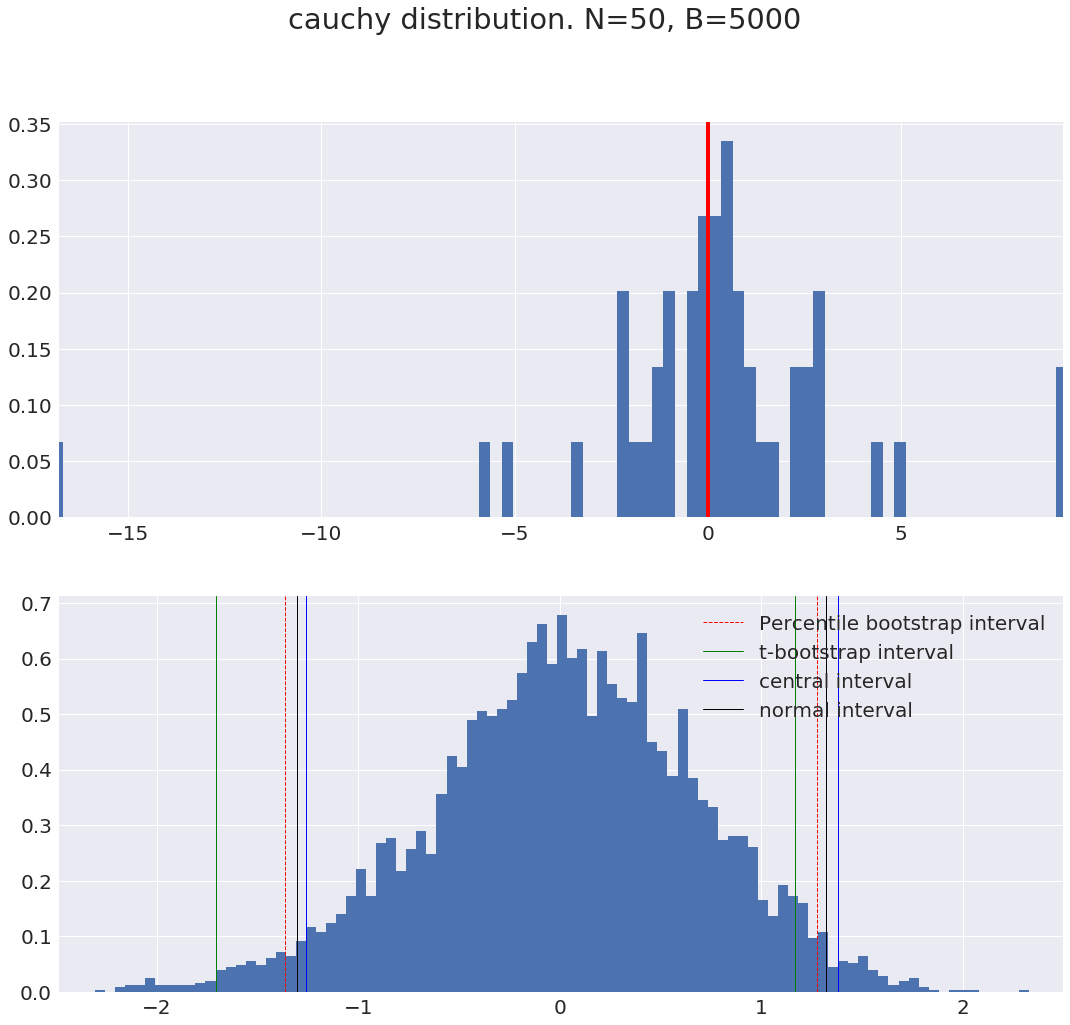

CPU times: user 925 ms, sys: 4 ms, total: 929 ms
Wall time: 926 ms


In [192]:
%%time
plot_statistics(cauchy())

# Нормальное распределение

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1080px-Normal_Distribution_PDF.svg.png" alt="drawing" width="400"/>

-0.3354538959589864 0.3236712401455323
[-0.5887969237095454, 0.6007264966929314]


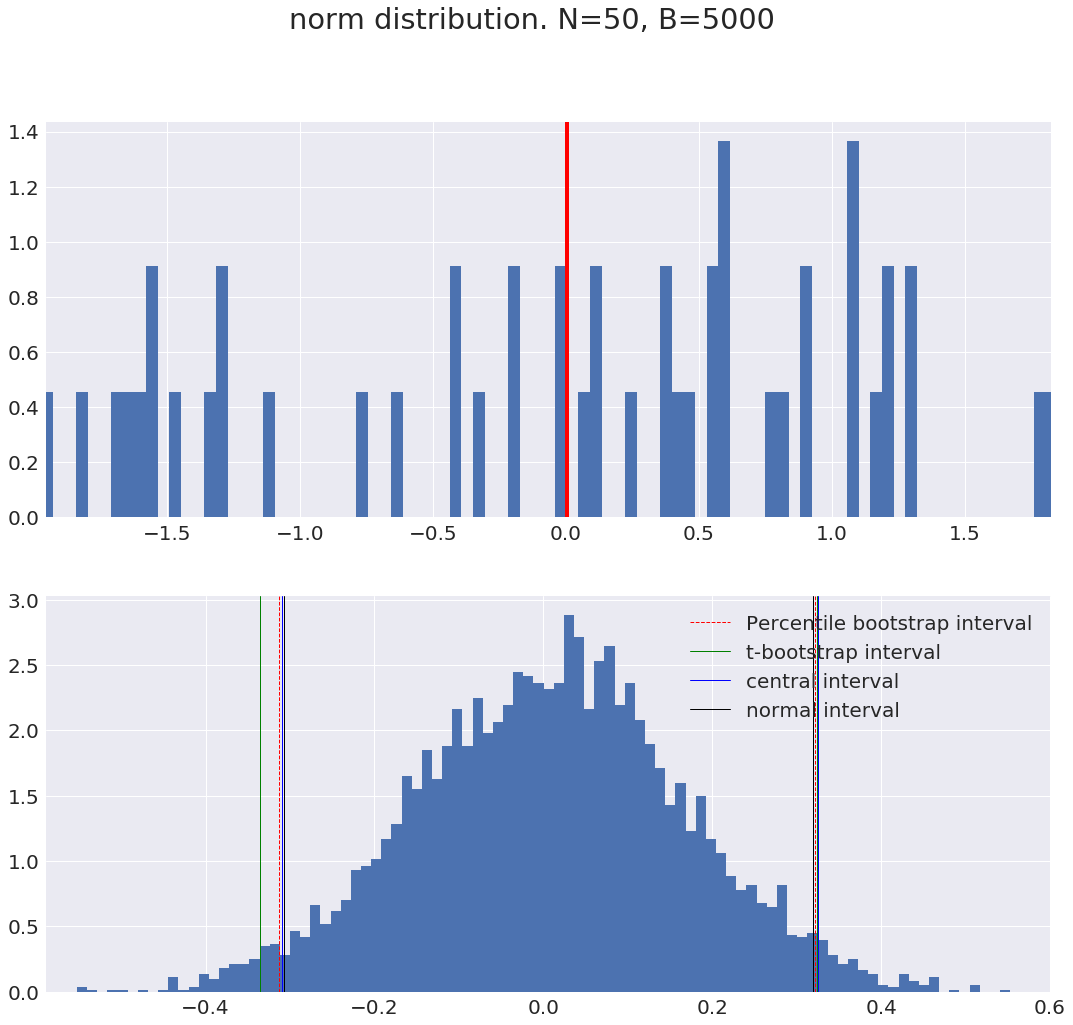

In [193]:
plot_statistics(norm())

# Экспоненциальное распределение

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Exponential_pdf.svg/360px-Exponential_pdf.svg.png" alt="drawing" width="400"/>

17.88274186189569 42.18487143558456
[7.416043423824579, 47.364932389755225]


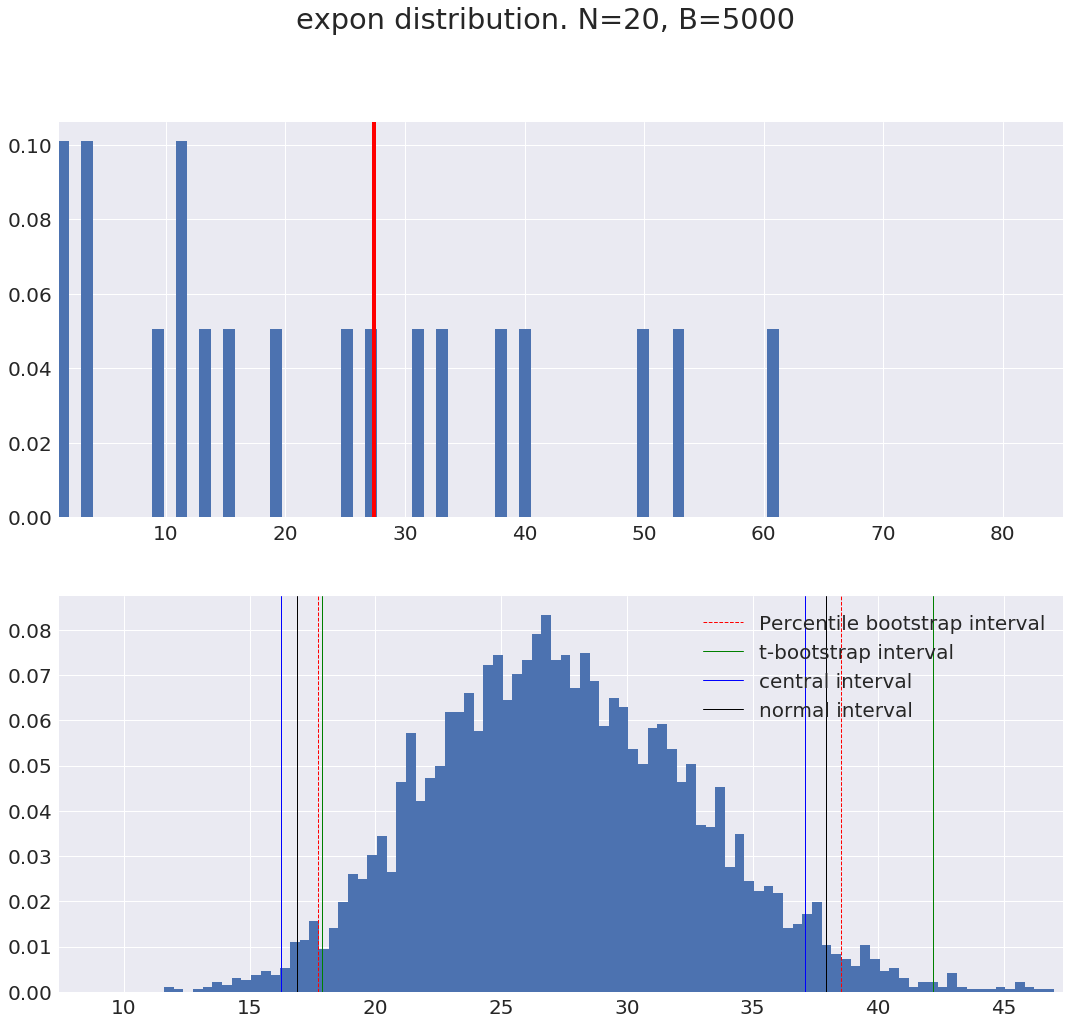

In [207]:
# 5 различных random seed для экспоненциального распределения
N = 20
plot_statistics(expon(scale=20))

# 2. Байесовский и классический подходы

# 3. Проверка гипотез. 

## 3.1 Задачка на монетку

## 3.2 Тест Уелча на примере рака груди

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('data.csv');
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df.head()

In [ ]:
#  count how many diagnosis are malignant (M) and how many are benign (B)
diagnosis_all = list(df.shape)[0]
diagnosis_categories = list(df['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                            diagnosis_categories[0], 
                                                                            diagnosis_categories[1]))
features_mean= list(df.columns[1:11])
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [ ]:
color_dic = {'M':'red', 'B':'blue'}
colors = df['diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.scatter_matrix(df[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

In [ ]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    plt.subplot(rows, 2, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette="Set1")
plt.tight_layout()
plt.show()

In [ ]:
# training the models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

# binarasing the diagnosis
diag_map = {'M':1, 'B':0}
df['diagnosis'] = df['diagnosis'].map(diag_map)

In [ ]:
#The nearest neighbors classifier finds predefined number of training samples closest in distance to the new point, and predict the label from these.
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

In [ ]:
from bootstrapped import *
from tests import bootstrap, bootstrap_ab, bootstrap_test
from tests import compute_beta, welch_test, empirical_false_pos_rate, plot_beta

In [ ]:
start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores_knn = cross_val_score(clf, X, y, cv=100)
end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))# видим что дисперсия сильно увеличилась с количеством фолдов
print("Execution time: {0:.5} seconds \n".format(end-start))

In [ ]:
#The Naive Bayes algorithm applies Bayes’ theorem with the assumption of independence between every pair of features.
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores_gnb = cross_val_score(clf, X, y, cv=100)
end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


In [ ]:
welch_test(scores_knn, scores_gnb, alpha, tail=2)
bootstrap_test(scores_knn, scores_gnb, alpha)
empirical_false_pos_rate(scores_knn, alpha)
beta = compute_beta(epsilon, sample_size, alpha, scores_knn, scores_gnb, beta_requirement=beta_requirement)
plot_beta(beta, epsilon, sample_size, beta_requirement=beta_requirement)
plt.show()

## 3.3 Критерий Манна-Уитни

In [ ]:
def mann_whitney(conversion_1, conversion_2, alpha=0.05):
    """
    conversion = (N, n), где N -- общее число визитов, n -- конверсия
    True => H_0 отклоняется => средние не равны
    """
    U_1 = conversion_1[1] * (conversion_2[0] - conversion_2[1]) + conversion_1[1] * conversion_2[1] / 2 + (conversion_2[0] - conversion_2[1]) * (conversion_1[0] - conversion_1[1]) / 2
    U_2 = conversion_2[1] * (conversion_1[0] - conversion_1[1]) + conversion_1[1] * conversion_2[1] / 2 + (conversion_2[0] - conversion_2[1]) * (conversion_1[0] - conversion_1[1]) / 2
    
    mean = conversion_1[0] * conversion_2[0] / 2
    N = conversion_1[0] + conversion_2[0]
    mn = conversion_1[0] * conversion_2[0]
    t_1 = (conversion_1[0] - conversion_1[1]) + (conversion_2[0] - conversion_2[1])
    t_2 = conversion_1[1] + conversion_2[1]
    std = (mn / (N * (N - 1))) * ((N**3 - N) / 12 - 
                                 (t_1**3 - t_1) / 12 - 
                                 (t_2**3 - t_2) / 12 )
    std = np.sqrt(std)
    z = np.abs(min(U_1, U_2) - mean) / std 
    return z, z > norm.ppf(1 - alpha / 2)

In [ ]:
from scipy.stats import norm
def wald_test(conversion_1, conversion_2, alpha=0.05):
    """
    Проверяется Вальд для Бернулли. Hehe, classic
    True => H_0 отклоняется => средние не равны
    """
    p_1 = conversion_1[1] / conversion_1[0]
    p_2 = conversion_2[1] / conversion_2[0]
    se_1 = np.sqrt(p_1 * (1 - p_1) / conversion_1[0])
    se_2 = np.sqrt(p_2 * (1 - p_2) / conversion_2[0])
    se = np.sqrt(se_1**2 + se_2**2)
    return np.abs((p_1 - p_2) / se), np.abs((p_1 - p_2) / se) > norm.ppf(1 - alpha / 2)

In [ ]:
from collections import defaultdict
results_mww = defaultdict(lambda: defaultdict(bool))
for i in np.arange(len(data)):
    for j in np.arange(len(data)):
        z, flag = mann_whitney(data[i], data[j], alpha=alpha)
        print(z)
        results_mww[i][j] = flag
        if results_mww[i][j]:
            print('Версия сайта {} с конверсией {:.2f} статистически отличается от версии {} с конверсией {:.2f}'.format(i+1, 
                                                                                              data[i][1] / data[i][0],
                                                                                              j+1,
                                                                                              data[j][1] / data[j][0]))
        else:
            print('Версия сайта {} с конверсией {:.2f} статистически не отличается от версии {} с конверсией {:.2f}'.format(i+1, 
                                                                                 data[i][1] / data[i][0],                                                                   data[j][1] / data[j][0]))
        print()

In [ ]:
from collections import defaultdict
results_wald = defaultdict(lambda: defaultdict(bool))
for i in np.arange(len(data)):
    for j in np.arange(len(data)):
        z, flag = wald_test(data[i], data[j], alpha=alpha)
        print(z)
        results_wald[i][j] = flag
        if results_wald[i][j]:
            print('Версия сайта {} с конверсией {:.2f} статистически отличается от версии {} с конверсией {:.2f}'.format(i+1, 
                                                                                              data[i][1] / data[i][0],
                                                                                              j+1,
                                                                                              data[j][1] / data[j][0]))
        else:
            print('Версия сайта {} с конверсией {:.2f} статистически не отличается от версии {} с конверсией {:.2f}'.format(i+1, 
                                                                                 data[i][1] / data[i][0],
                                                                                 j+1,
                                                                                 data[j][1] / data[j][0]))
        print()

# 4. Коррекция на множественные тесты

In [ ]:
!pip install nilearn
import nilearn
import pandas as pd
from nilearn import datasets
from scipy.misc import imread
from nilearn import datasets
from nilearn.plotting import show


In [ ]:
#Load Haxby dataset
haxby_dataset = datasets.fetch_haxby(subjects=[2], fetch_stimuli=True)
haxby_dataset.keys()

In [ ]:
stimulus_information = haxby_dataset.stimuli

In [ ]:
for stim_type in sorted(stimulus_information.keys()):
    if stim_type == b'controls':
        continue
    file_names = stimulus_information[stim_type]
    plt.figure()
    for i in range(48):
        plt.subplot(6, 8, i + 1)
        try:
            plt.imshow(imread(file_names[i]), cmap=plt.cm.gray)
        except:
            pass
        plt.axis("off")
    plt.suptitle(stim_type)
show()

In [ ]:
print(haxby_dataset.func[0])
img_temp = nilearn.image.load_img(haxby_dataset.func[0])
print(img_temp.shape)

In [ ]:
print(haxby_dataset.session_target[0])
behavioral = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
conditions = behavioral['labels']
print(behavioral.shape)
behavioral.head()

In [ ]:
# Размер одного фмрт изображения, где первые 3 начения это разрешения 3D картинки и 1452 отсчета по времени
print(img_temp.shape)
# И для каждого отсчета известны ключи (визуальные стимулы) для task-based fMRI 
print(conditions.shape)

In [ ]:
# Воксель - это 3D пиксель. 
# То есть ниже [20,...] -- двухмерный срез пикселей из трехмерного массива, 800 -- отсчет времени
plt.imshow(img_temp.dataobj[20, ..., 800])
# Тут же можно оценить глазами интенсивность каждого вокселя: условно, 
# чем больше крови аккумулируется в данном участке мозга,
# тем интенсивнее сигнал и тем выше активность этого этого региона для каждой когнитивной функции.

In [ ]:
# mask data
mask_filename = haxby_dataset.mask
from nilearn.input_data import NiftiMasker
nifti_masker = NiftiMasker(smoothing_fwhm=8, mask_img=mask_filename, memory='nilearn_cache', memory_level=1)  # cache options
func_filename = haxby_dataset.func[0]
fmri_masked = nifti_masker.fit_transform(func_filename)

In [ ]:
# Теперь у нас есть 2D массив, который мы и будем использовать в качестве датасета.
# Каждому визуальному ключу ( отсчету времени) соотносятся интенсивности вокселей
# (да, да все воксели кортикальной височной зоны для 1 человека из 6):
print(fmri_masked.shape)
# То есть 
print('Для целикового изображения было бы {}, но мы снизили размерность в 4 раза, наложив маску до 39912'.format(40*64*64))

In [ ]:
# Посмотрим на то, как изменяется сигнал интенсивности одного вокселя во времени (для 1 человека)
plt.figure(figsize=(8, 6))
plt.plot(fmri_masked[:, 11132:11136])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)
show()

In [ ]:
labels = pd.read_csv(haxby_dataset.session_target[0], sep=" ")

conditions = labels['labels']
categories = conditions.unique()
conditions_encoded = np.zeros_like(conditions)

for c, category in enumerate(categories):
    conditions_encoded[conditions == category] = c

sessions = labels['chunks']
condition_mask = conditions.isin(['face', 'house'])
conditions_encoded = conditions_encoded[condition_mask]
fmri_masked = fmri_masked[condition_mask]

# Мы посчитаем, среднее изображение и состояние сессии.
# В противном случае, наблюдения не могут быть обменены в случайном порядке, потому что
# существует зависимость между наблюдениями в рамках одной сессии.
n_sessions = np.unique(sessions).size
grouped_fmri_masked = np.empty((2 * n_sessions,  # two conditions per session
                                fmri_masked.shape[1]))
grouped_conditions_encoded = np.empty((2 * n_sessions, 1))

for s in range(n_sessions):
    session_mask = sessions[condition_mask] == s
    session_house_mask = np.logical_and(session_mask,
                                        conditions[condition_mask] == 'house')
    session_face_mask = np.logical_and(session_mask,
                                       conditions[condition_mask] == 'face')
    grouped_fmri_masked[2 * s] = fmri_masked[session_house_mask].mean(0)
    grouped_fmri_masked[2 * s + 1] = fmri_masked[session_face_mask].mean(0)
    grouped_conditions_encoded[2 * s] = conditions_encoded[
        session_house_mask][0]
    grouped_conditions_encoded[2 * s + 1] = conditions_encoded[
        session_face_mask][0]

In [ ]:
# То есть выбрали только для 2х тем ( по 12 сессия каждая) и размерность осталась как у каждого человека
grouped_fmri_masked.shape

In [ ]:
# Посмотрим на наши ключи:
# визуальные стимулы показывали сессиями chunks по 9 временных отсчетов (временной интервал около 2.5 секунд). 
# можно, кстати, посчитать, что люди лежали в томографе 2.5*1452/3600=1.008 - почти час
# всего сессий было 12.
labels['labels'].value_counts()

In [ ]:
grouped_conditions_encoded.shape

In [ ]:
grouped_fmri_masked.shape

In [ ]:
from nilearn.mass_univariate import permuted_ols
permuted_ols?

In [ ]:
neg_log_pvals, t_scores_original_data, _ = permuted_ols(tested_vars=grouped_conditions_encoded, 
                                                        target_vars=grouped_fmri_masked,
                                                        n_perm=10000, two_sided_test=True,
                                                        n_jobs=-1)

signed_neg_log_pvals = neg_log_pvals * np.sign(t_scores_original_data)

signed_neg_log_pvals_unmasked = nifti_masker.inverse_transform(signed_neg_log_pvals)



In [ ]:


from sklearn.feature_selection import f_regression
f_regression?



In [ ]:
_, pvals_bonferroni = f_regression(X=grouped_fmri_masked, y=grouped_conditions_encoded)
# Давайте попробуем убрать эту коррекцию на множественное сравнение
pvals_bonferroni *= fmri_masked.shape[1] # Корреция на множественное сравнение (FDR) - Bonferroni to death
pvals_bonferroni[np.isnan(pvals_bonferroni)] = 1
pvals_bonferroni[pvals_bonferroni > 1] = 1
neg_log_pvals_bonferroni = -np.log10(pvals_bonferroni)
neg_log_pvals_bonferroni_unmasked = nifti_masker.inverse_transform(neg_log_pvals_bonferroni)


In [ ]:
from nilearn.plotting import plot_stat_map, show

# Сконкатим все мозги, чтобы построить воксели на "усредненном" изображении
from nilearn import image
mean_fmri_img = image.mean_img(func_filename)

threshold = -np.log10(0.1)  # Попробуем тут эмпирический трешхолд 10% corrected

vmax = min(signed_neg_log_pvals.max(),
           neg_log_pvals_bonferroni.max())

# Plot thresholded p-values map corresponding to F-scores
display = plot_stat_map(neg_log_pvals_bonferroni_unmasked, mean_fmri_img,
                        threshold=threshold, cmap=plt.cm.RdBu_r,
                        display_mode='z', cut_coords=[-1, ],
                        vmax=vmax)

neg_log_pvals_bonferroni_data = neg_log_pvals_bonferroni_unmasked.get_data()
n_detections = (neg_log_pvals_bonferroni_data > threshold).sum()
title = ('Negative $\log_{10}$ p-values'
         '\n(Parametric two-sided F-test'
         '\n+ Bonferroni correction)'
         '\n%d detections') % n_detections

display.title(title, y=1.1)

#  Карта с регрессионного анализа и соответсвующие p-values с МНК (OLS) анализа
display = plot_stat_map(signed_neg_log_pvals_unmasked, mean_fmri_img,
                        threshold=threshold, cmap=plt.cm.RdBu_r,
                        display_mode='z', cut_coords=[-1, ],
                        vmax=vmax)

n_detections = (np.abs(signed_neg_log_pvals) > threshold).sum()
title = ('Negative $\log_{10}$ p-values'
         '\n(Non-parametric two-sided test'
         '\n+ max-type correction)'
         '\n%d detections') % n_detections

display.title(title, y=1.1)

show()

In [210]:
from nilearn import datasets
n_samples = 20
localizer_dataset = datasets.fetch_localizer_calculation_task(
    n_subjects=n_samples)

/home/acapello/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Dataset created in /home/acapello/nilearn_data/brainomics_localizer



Downloaded 4961223 of 4961223 bytes (100.0%,    0.0s remaining) ...done. (10 seconds, 0 min)
Extracting data from /home/acapello/nilearn_data/brainomics_localizer/bf581cb2033ecf23e282e858793fa1e0/brainomics_data_11.zip..... done.


Downloaded 1555 of 1555 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 64001 of 64001 bytes (100.0%,    0.0s remaining) ...done. (3 seconds, 0 min)
/home/acapello/anaconda3/lib/python3.6/site-packages/numpy/lib/npyio.py:2266: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [211]:
cmap_filenames = localizer_dataset.cmaps

In [212]:
import pandas as pd
design_matrix = pd.DataFrame([1] * n_samples, columns=['intercept'])

In [215]:
from nistats.second_level_model import SecondLevelModel
second_level_model = SecondLevelModel().fit(
    cmap_filenames, design_matrix=design_matrix)

/home/acapello/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [216]:
z_map = second_level_model.compute_contrast(output_type='z_score')

In [217]:
from nistats.thresholding import map_threshold
thresholded_map1, threshold1 = map_threshold(
    z_map, level=.001, height_control='fpr', cluster_threshold=10)

In [218]:
thresholded_map2, threshold2 = map_threshold(
    z_map, level=.05, height_control='fdr')
print('The FDR=.05 threshold is %.3g' % threshold2)

The FDR=.05 threshold is 2.06


In [219]:
thresholded_map3, threshold3 = map_threshold(
    z_map, level=.05, height_control='bonferroni')
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold3)

The p<.05 Bonferroni-corrected threshold is 4.74


/home/acapello/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/acapello/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/acapello/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


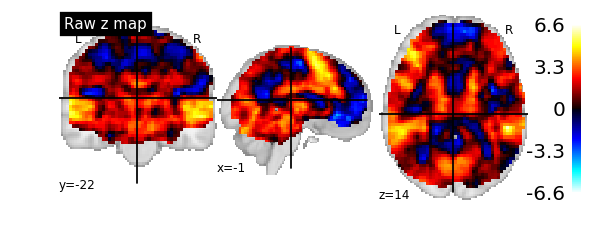

In [220]:
from nilearn import plotting
display = plotting.plot_stat_map(z_map, title='Raw z map')

/home/acapello/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


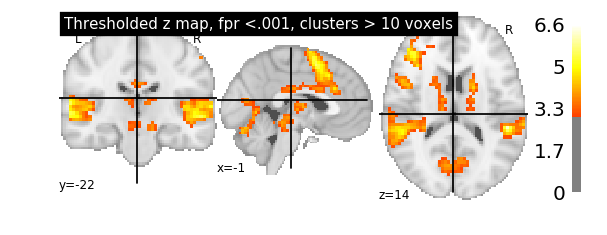

In [221]:
plotting.plot_stat_map(
    thresholded_map1, cut_coords=display.cut_coords, threshold=threshold1,
    title='Thresholded z map, fpr <.001, clusters > 10 voxels')

/home/acapello/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


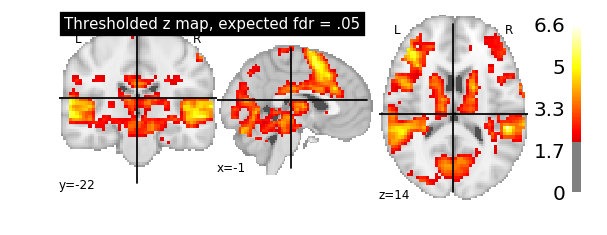

In [222]:
plotting.plot_stat_map(thresholded_map2, cut_coords=display.cut_coords,
                       title='Thresholded z map, expected fdr = .05',
                       threshold=threshold2)

/home/acapello/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


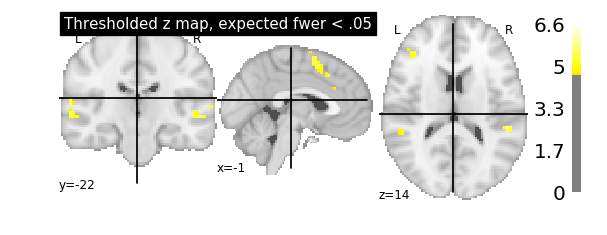

In [223]:
plotting.plot_stat_map(thresholded_map3, cut_coords=display.cut_coords,
                       title='Thresholded z map, expected fwer < .05',
                       threshold=threshold3)